In [1]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mpiesio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpiesio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mpiesio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

C:\Users\mpiesio\AppData\Local\Temp\ipykernel_43552\1901241759.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


Rozkład klas (Spam vs. Nie-Spam):
Spam
0    0.865937
1    0.134063
Name: proportion, dtype: float64

Wybrane cechy (ważność > 0.001):
['0800' '08000930705' '100' '1000' '10p' '10pmin' '12' '150' '150p'
 '150pm' '150pmsg' '150ppm' '16' '18' '1st' '2000' '2003' '250' '25p'
 '2nd' '300' '500' '5000' '62468' '750' '800' '8007' '86688' 'admirer'
 'alert' 'apply' 'attempt' 'auction' 'await' 'awaiting' 'award' 'awarded'
 'bonus' 'box' 'call' 'camcorder' 'camera' 'cash' 'chance' 'charged'
 'chat' 'choose' 'claim' 'club' 'code' 'collect' 'collection' 'come'
 'contact' 'content' 'cost' 'credit' 'customer' 'dating' 'day' 'delivery'
 'direct' 'dont' 'draw' 'eg' 'end' 'enjoy' 'enough' 'entry' 'every'
 'expires' 'fancy' 'fantasy' 'find' 'free' 'freemsg' 'game' 'get' 'gift'
 'got' 'guaranteed' 'help' 'hi' 'holiday' 'httpwwwurawinnercom'
 'identifier' 'ill' 'im' 'immediately' 'important' 'information' 'know'
 'landline' 'later' 'latest' 'like' 'line' 'link' 'live' 'lost' 'ltd'
 'lucky' 'maximize' 'mes

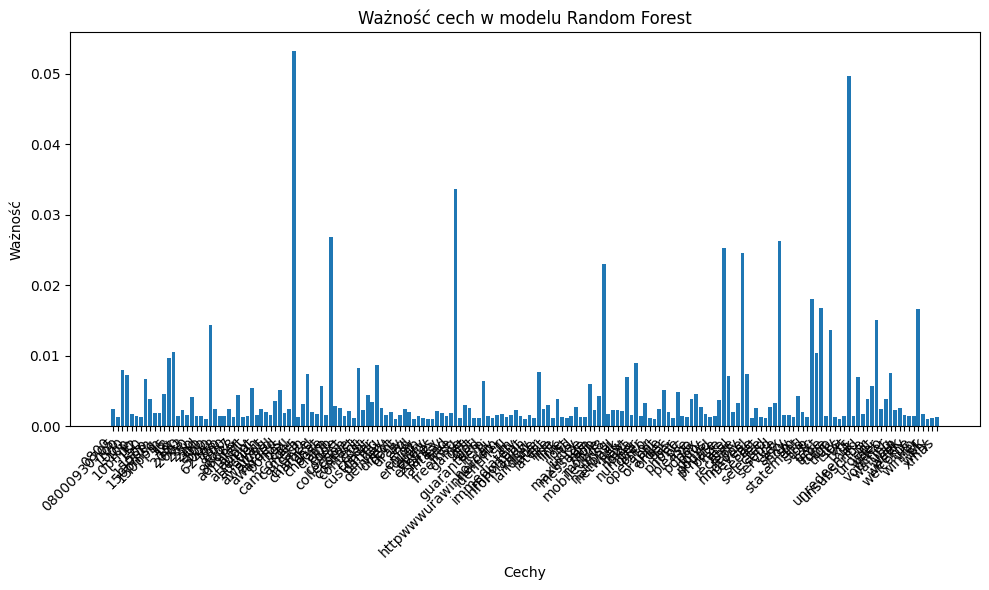

C:\Users\mpiesio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mpiesio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mpiesio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mpi


Najlepsze hiperparametry:
{'clf__max_depth': None, 'clf__n_estimators': 100, 'tfidf__max_df': 0.5, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1)}

Najlepszy wynik (accuracy): 0.9466015410708982

Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Wyniki zapisano do 'spam_predictions.csv'.


In [1]:
import numpy as np
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# pobieranie zasoby NLTK
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Błąd podczas pobierania zasobów NLTK: {e}")
    exit()

# ładowanie danych
try:
    spam_dataset = pd.read_csv('C:\\Users\\mpiesio\\Desktop\\KODILLA\\wizualizacja\\spam.csv', 
                              encoding="ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'], skiprows=1)
    spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
except FileNotFoundError:
    print("Błąd: Plik spam.csv nie istnieje. Podaj poprawną ścieżkę.")
    exit()

#  balans klas
print("Rozkład klas (Spam vs. Nie-Spam):")
print(spam_dataset['Spam'].value_counts(normalize=True))

# Funkcje do preprocessingu tekstu
def remove_punctuation(text):
    return ''.join(word for word in text if word not in string.punctuation)

def tokenize(text):
    clean_text = text.lower()
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

lemmatizer = nltk.WordNetLemmatizer()
def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text]

# Preprocessing danych
spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(remove_punctuation)
spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(tokenize)
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(remove_stopwords)
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lemmatize)

#  dane do modelowania
X = spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x))
y = spam_dataset['Spam']

# Podział na zbiór treningowy i testowy (stratyfikacja)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline z TF-IDF i Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.5, min_df=0.001)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Trening pierwszego modelu Random Forest
pipeline.fit(X_train, y_train)

# Wyciągnięcie ważności cech
tfidf = pipeline.named_steps['tfidf']
clf = pipeline.named_steps['clf']
feature_importances = clf.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Selekcja cech (ważność > 0.001)
important_features = feature_names[feature_importances > 0.001]
important_indices = np.where(feature_importances > 0.001)[0]

print("\nWybrane cechy (ważność > 0.001):")
print(important_features)

# Wizualizacja ważności cech
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features)), feature_importances[important_indices], align='center')
plt.xticks(range(len(important_features)), important_features, rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w modelu Random Forest')
plt.tight_layout()
plt.show()

# Nowy pipeline z wybranymi cechami
class FeatureSelector:
    def __init__(self, indices):
        self.indices = indices
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[:, self.indices]

new_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.5, min_df=0.001)),
    ('selector', FeatureSelector(important_indices)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Hiperparametry dla GridSearchCV
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigramy i bigramy
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [0.001, 0.005],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None]
}

# GridSearchCV
grid_search = GridSearchCV(
    new_pipeline,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Trening modelu z GridSearch
grid_search.fit(X_train, y_train)

# Wyniki
print("\nNajlepsze hiperparametry:")
print(grid_search.best_params_)
print("\nNajlepszy wynik (accuracy):", grid_search.best_score_)

# Ocena na zbiorze testowym
y_pred = grid_search.predict(X_test)
print("\nWyniki na zbiorze testowym:")
print(classification_report(y_test, y_pred))

# Zapisz wyniki
results = pd.DataFrame({
    'Text': X_test,
    'True_Label': y_test,
    'Predicted_Label': y_pred
})
results.to_csv('C:\\Users\\mpiesio\\Desktop\\KODILLA\\wizualizacja\\spam_predictions.csv', index=False)
print("\nWyniki zapisano do 'spam_predictions.csv'.")